In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pygmo import *

In [17]:
# This class was modeled from the pygmo Documentation. 
# This class is required for me to be able to run the PSO algorithm from 'pygmo'
# The 'best_fit' that you see here is declared inside the 'pso_optimizer' function
class F4:
    def __init__(self, given_bias, given_bounds, given_dimensions):
        
        self.given_bias = given_bias
        self.given_bounds = given_bounds 
        self.given_dimensions = given_dimensions

    def fitness(self, x):
        global best_fit
        
        Function = 0
        
        for i in range(self.given_dimensions - 1):
            
            z_func = x[i] - f4_shift_values[i]
            Function += z_func**2 - (10 * np.cos(2 * np.pi * z_func)) + 10
        
        rastrigin_function = Function + self.given_bias
        best_fit.append(rastrigin_function)
        return [rastrigin_function]

    def get_bounds(self):
        return ([self.given_bounds[0]] * self.given_dimensions, [self.given_bounds[1]] * self.given_dimensions)


In [18]:
# Partical Swarm Optimization Function is Defined Below 

def pso_optimizer(given_bias, given_bounds, given_dimensions):
    
####Parameters Intialization
    
    # Population size list
    pop_list = [50, 100, 150]
    
    # omega in pygmo
    inertia_factor_list = [0.3,0.5,0.7,0.9]
    
    # eta1: Congnitive component in pygo
    self_confidence_list = [1,2,3]
    
    # eta2: Socialcomponent in pygmo
    swarm_confidence_list = [1,2,3]
    
    #vcoeff : Maximum Velocity Coefficient with bound width [0,1]
    vcoeff_list = [0.3,0.5,0.7,0.9]
    
    
    
    global best_fit
    current_optimal_fitness_value = np.inf
    # Best fitness results are all saved in these lists
    optimal_parameter_fitness = []
    optimal_parameter_result = []
    optimal_parameter_inertia_factor = []
    optimal_parameter_self_confidence = []
    optimal_parameter_swarm_confidence = []
    optimal_parameter_vcoeff = []
    optimal_parameter_pop = []
    optimal_parameter_best_fit_curve = [] 
    
    
    # Problem Definition in Pygmo
    p = problem(F4(given_bias,given_bounds,given_dimensions))
    
    # The solving part 
    for inertia_factor in inertia_factor_list:
        for self_confidence in self_confidence_list:
            for swarm_confidence in swarm_confidence_list:
                for vcoeff in vcoeff_list:
                    for pop in pop_list:
                        best_fit = []
                        
                        #PSO and Population object is defined here 
                        Population = population(p,pop)
                        pso_algo = algorithm(pso(gen=1200, omega = inertia_factor, eta1= self_confidence, eta2 = swarm_confidence,max_vel=vcoeff,seed=4)) 
                                                            # I wanted to use more than 1000 but due to time contraints i can't
                                                           # takes too much time to run so the results i get with 1200 should do
                        
                        final_result = pso_algo.evolve(Population)
                        
                        # Results are now appended in all of the empty optimal parameter lists that were defined in the above
                        if final_result.champion_f < current_optimal_fitness_value:
                            current_optimal_fitness_value = final_result.champion_f
                            optimal_parameter_fitness.append(final_result.champion_f)
                            optimal_parameter_result.append(final_result.champion_x)
                            optimal_parameter_inertia_factor.append(inertia_factor)
                            optimal_parameter_self_confidence.append(self_confidence)
                            optimal_parameter_swarm_confidence.append(swarm_confidence)
                            optimal_parameter_vcoeff.append(vcoeff)
                            optimal_parameter_pop = pop
                            optimal_parameter_best_fit_curve = best_fit
                            
    print("The Optimal Parameters are printed here below")
    print("Optimal Interia Factor: ", optimal_parameter_inertia_factor )
    print("Optimal Self Confidence: ", optimal_parameter_self_confidence)
    print("Optimal Swarm Confidence: ", optimal_parameter_swarm_confidence)
    print("Optimal Maximum Partical Velocity: ", optimal_parameter_vcoeff)
    print("Optimal Population Size: ", optimal_parameter_pop)
    print("The Best fitness: ", optimal_parameter_fitness)
    print("The optimal Result: ", optimal_parameter_result)
    
    # For generation 1200 that was specified the min of each swarm
    curve = np.array([np.min(np.array(optimal_parameter_best_fit_curve[i:i+optimal_parameter_pop])) for i in range(0,len(optimal_parameter_best_fit_curve), optimal_parameter_pop)])
    
    plt.plot(curve)
    
    if given_dimensions == 50:
        plt.savefig("curve_dimension_50_Rastrigin_pso.png")
        result_df = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df.to_csv("Result_pso_50_Rastrigin.csv")
    
    else:
        plt.savefig("curve_dimension_500_Rastrigin_pso.png")
        # Saving solution to csv
        result_df1 = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df1.to_csv("Result_pso_500_Rastrigin.csv")                                     
                
    

Dimension 50 - PSO_Rastrigin

The Optimal Parameters are printed here below
Optimal Interia Factor:  [0.3]
Optimal Self Confidence:  [1]
Optimal Swarm Confidence:  [3]
Optimal Maximum Partical Velocity:  [0.3]
Optimal Population Size:  150
The Best fitness:  [array([145.54227558])]
The optimal Result:  [array([ 2.86155092,  3.22159761, -0.75597655, -1.3739473 ,  1.37326236,
        3.47271956, -6.00447295,  5.87400271,  0.80852497, -1.74143686,
        6.36475756,  3.19076548, -1.70538251,  4.66379467,  2.68137184,
        3.90003014, -2.46243607, -4.76082191, -1.70091252, -0.92234342,
       -4.21013406,  2.45355502, -2.86362995, -3.95384408,  5.39815649,
       -1.31217571, -4.57826035,  3.51199391, -3.50257988,  8.17583843,
       -1.27456735, -1.37308092, -0.5814226 , -6.70379951,  2.50544054,
       -3.63540121,  2.83388525,  2.15081872, -0.14547255,  3.69320757,
       -0.61682866,  6.95024158, -0.63542958,  3.30041928, -7.85374862,
        4.881609  ,  1.19864629, -8.26832142,  

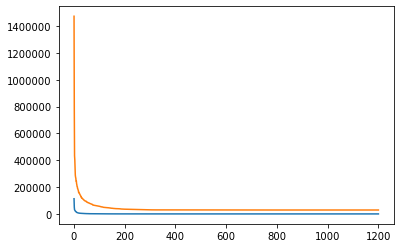

In [19]:
if __name__=="__main__":
    
    f4_shift_values = []
    
    with open('F4_shift_values.txt','r') as f:
        for line in f:
            f4_shift_values.append(float(line[:-1]))
              
    # Parameters for F4

    given_bias = -390
    given_dimensions = (50,500)
    given_bounds = (-100,100)
              
    best_fit = []
              
    print("Dimension 50 - PSO_Rastrigin\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[0])
              
    print("Dimension 500 - PSO_Rastrigin\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[1])